# **Principles of Data Analytics - Tasks**

### Authored by: Stephen Kerr

#### **Assessment Links:**

- The Tasks Descriptions are outlined in the following link: [Assessment Description][def1]
- The Marking Scheme is outlined in the following link: [Assesment Marking Scheme][def2] 


[def1]: https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/tasks.md
[def2]: https://github.com/ianmcloughlin/principles_of_data_analytics/blob/main/assessment/instructions.md

## **Task 1: Source the Data Set**


### ***Task 1 Description:***

Import the Iris data set from the sklearn.datasets module.  
Explain, in your own words, what the load_iris() function returns.

### ***Task 1 Submission:***

The **load_iris()** function loads the Iris dataset which is classic multi-class classification dataset.  
The dataset is imported as a *'Bunch'* which is a dictionary like-object with the following attributes:  
- **'data'** which is the data matrix.
- **'target'** which is the classification target.
- **'feature_name'** which is a list of the dataset columns.
- **'target_names'** which is a list of the target classes.
- **'data'** attribute being a pandas Dataframe.
- **'target'** attribute is a pandas Series.
- **'DESCR'** which is a string that is a full desciption of the dataset.
- **'filename'** which is a sting showing the path to the location of the data.

The iris data was loaded with the parameter ***'as_frame'*** set as *True* resulting in:


There is also an *additional attribute* when the load_iris() is loaded with the ***'as_frame'*** = *True*, called **'frame'** which is a pandas DataFrame with the combination of data and target. 

---

## References: 

1. [![load_iris](https://tse4.mm.bing.net/th?id=OIP.Hf2oXZgEGL98vH30SEeZQQAAAA&pid=Api&P=0&h=180) Click the image to learn more about load_iris](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html)
2. [Markdown Syntax Cheatsheet](https://www.markdown-cheatsheet.com/ "Here the title goes")

In [33]:
# import sklearn as skl
# import numpy as np
# import pandas as pd
# import matplotlib as plt
import sklearn as skl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the iris data set as 'data_bunch'.
# Note, used the parameter 'as_frame' = True to get the data in a pandas DataFrame.
iris = skl.datasets.load_iris(as_frame=True)

# Print the Iris Data type: # Reference https://scikit-learn.org/stable/modules/generated/sklearn.utils.Bunch.html#sklearn.utils.Bunch
print(f'The Iris Data Set is a {type(iris)}\n'
      f'A Bunch is the scikit-learn data type that stores the data in a dictionary-like object.\n'
      f'The Bunch object is a dictionary that stores the data in key-value pairs.\n'
      f'The keys are the attributes of the data set and the values are the data values.\n')

# printed the 'iris' data bunch attributes / keys
print(f'The following are the Attributes of the Iris Data Set:' )
for key in iris.keys():
    if key == 'frame':
        print(f'\t{key} - This is the main source of the data.') 
    else: 
        print(f'\t{key}')

# In the Iris Data Bunch the 'frame' DataFrame is the key store of data, 
# To compleete the DataFrame we need to add in a 'species' column,
# In order to the assign each row to the appropraite species class ['setosa' 'versicolor' 'virginica'],
# We use the map() method the 'target' column of the 'frame' DataFrame and the 'target_names' list,
iris['frame']['species'] = iris['frame']['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

# Asigning the 'iris_dataframe' as 'iris['frame'] 
iris_dataframe = iris['frame']

The Iris Data Set is a <class 'sklearn.utils._bunch.Bunch'>
A Bunch is the scikit-learn data type that stores the data in a dictionary-like object.
The Bunch object is a dictionary that stores the data in key-value pairs.
The keys are the attributes of the data set and the values are the data values.

The following are the Attributes of the Iris Data Set:
	data
	target
	frame - This is the main source of the data.
	target_names
	DESCR
	feature_names
	filename
	data_module


## **Task 2: Explore the Data Structure**

### ***Task 2 Description:*** 

Print and explain the shape of the data set, the first and last 5 rows of the data, the feature names, and the target classes.

### ***Task 2 Submission:***



The target classes where assigned to the ***'iris_dataframe'*** in the last section.

In [34]:
# Shape of iris dataset - Note we added the 'species' column 
print(f'The shape of the Iris Dataset (\'iris_dataframe\') is: '
      f'\n \tRows (instances) = {iris_dataframe.shape[0]},'
      f'\n \tColumns (features) = {iris_dataframe.shape[1]},\n')

The shape of the Iris Dataset ('iris_dataframe') is: 
 	Rows (instances) = 150,
 	Columns (features) = 6,



In [35]:
# The first 5 rows of the Iris Data Set using the .head() and .style Pandas method: 
# Reference https://www.delftstack.com/howto/python-pandas/pandas-display-dataframe-in-a-table-style/
iris_dataframe.head().style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.100000,3.500000,1.400000,0.200000,0,setosa
1,4.900000,3.000000,1.400000,0.200000,0,setosa
2,4.700000,3.200000,1.300000,0.200000,0,setosa
3,4.600000,3.100000,1.500000,0.200000,0,setosa
4,5.000000,3.600000,1.400000,0.200000,0,setosa


In [36]:
# The last 5 rows of the Iris Data Set using the .tail() and .style Pandas method:
iris_dataframe.tail().style

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
145,6.700000,3.000000,5.200000,2.300000,2,virginica
146,6.300000,2.500000,5.000000,1.900000,2,virginica
147,6.500000,3.000000,5.200000,2.000000,2,virginica
148,6.200000,3.400000,5.400000,2.300000,2,virginica
149,5.900000,3.000000,5.100000,1.800000,2,virginica


In [37]:
# The feature names are:
print('The following is all the feature names and target classes for the Iris Dataset:')
for i, key in enumerate(iris_dataframe.keys(), start=1):
    if key == 'target' or key == 'species':
        print(f'\t {i}. {key} is a target class.')
    else: 
        print(f'\t {i}. {key} is a feature name.')


# Note previously we added in a new column that assigns each row to the appropriate target class. 
# Could replace the 'target' column with the 'species' to cutdown on data

The following is all the feature names and target classes for the Iris Dataset:
	 1. sepal length (cm) is a feature name.
	 2. sepal width (cm) is a feature name.
	 3. petal length (cm) is a feature name.
	 4. petal width (cm) is a feature name.
	 5. target is a target class.
	 6. species is a target class.


In [38]:
# Subsetting the 'iris_dataframe' by the 'species' 
# Reference https://app.datacamp.com/

# creating the 'setosa_DataFrame'
setosa_dataframe = iris_dataframe[iris_dataframe['species'] == 'setosa']
# displaying the total number of 'setosa' in the dataset
print(f'The number of setosa in the dataset = {setosa_dataframe.shape[0]}'
      f'\nWhich is a percentage of {((setosa_dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')

# creating the 'versicolor_DataFrame'
versicolor_dataframe = iris_dataframe[iris_dataframe['species'] == 'versicolor']
# displaying the total number of 'setosa' in the dataset
print(f'The number of versicolor in the dataset = {versicolor_dataframe.shape[0]}'
      f'\nWhich is a percentage of {((versicolor_dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')

# creating the 'virginica_DataFrame'
virginica_dataframe = iris_dataframe[iris_dataframe['species'] == 'virginica']
# displaying the total number of 'setosa' in the dataset
print(f'The number of virginica in the dataset = {virginica_dataframe.shape[0]}'
      f'\nWhich is a percentage of {((virginica_dataframe.shape[0]/iris_dataframe.shape[0])*100):.2f}%\n')



The number of setosa in the dataset = 50
Which is a percentage of 33.33%

The number of versicolor in the dataset = 50
Which is a percentage of 33.33%

The number of virginica in the dataset = 50
Which is a percentage of 33.33%



## **Task 3: Summarize the Data**

### ***Task 3 Description:*** 

For each feature in the dataset, calculate and display:

- mean
- minimum
- maximum
- standard deviation
- median

### ***Task 3 Submission:***

In the code below you can see that the mean, minimum, maximum, standard deviation, median for the Feature Names of the Iris dataset, and in the species subset.

In [39]:
# use the describe() method to get the descriptive statistics of the features in the iris dataset
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
# Reference: https://www.geeksforgeeks.org/python-pandas-dataframe-describe-method/

# creating a function to print the descriptive statistics of a given feature
def statistic_print(feature, statistics):
    print(f'The following are the descriptive statistics for the feature: {feature}')
    for stat_name, stat_value in statistics.items():
        if stat_name == '50%': # changing the '50%' to 'median'
            stat_name = 'median'
        elif stat_name == 'count': # skipping the 'count' statistic as requested
            continue
        elif stat_name == '25%': # skipping the '25%' statistic as requested
            continue
        elif stat_name == '75%': # skipping the '75%' statistic as requested
            continue
        print(f'{stat_name}: {stat_value}') # printing out each statistic
    print('\n')



# Loop through the species in the iris dataset 
# and print the descriptive statistics for each species
for species in iris_dataframe['species'].unique(): # getting the unique species
    print(f'Descriptive statistics for species: {species}\n') # printing the species name
    species_data = iris_dataframe[iris_dataframe['species'] == species]
    for feature in iris_dataframe.columns[:-2]:  # Exclude 'target' and 'species' columns
        statistics = species_data[feature].describe()
        statistic_print(feature, statistics)

# Reference: http://geeksforgeeks.org/get-unique-values-from-a-column-in-pandas-dataframe/

Descriptive statistics for species: setosa

The following are the descriptive statistics for the feature: sepal length (cm)
mean: 5.006
std: 0.35248968721345136
min: 4.3
median: 5.0
max: 5.8


The following are the descriptive statistics for the feature: sepal width (cm)
mean: 3.428
std: 0.3790643690962887
min: 2.3
median: 3.4
max: 4.4


The following are the descriptive statistics for the feature: petal length (cm)
mean: 1.4620000000000002
std: 0.17366399648018407
min: 1.0
median: 1.5
max: 1.9


The following are the descriptive statistics for the feature: petal width (cm)
mean: 0.24599999999999997
std: 0.10538558938004565
min: 0.1
median: 0.2
max: 0.6


Descriptive statistics for species: versicolor

The following are the descriptive statistics for the feature: sepal length (cm)
mean: 5.936
std: 0.5161711470638634
min: 4.9
median: 5.9
max: 7.0


The following are the descriptive statistics for the feature: sepal width (cm)
mean: 2.7700000000000005
std: 0.3137983233784114
min: 2.0
med

## Task 4: Visualize Features

### ***Task 4 Description:*** 

Plot histograms for each feature using matplotlib.  
Add appropriate titles and axis labels.

### ***Task 4 Submission:***

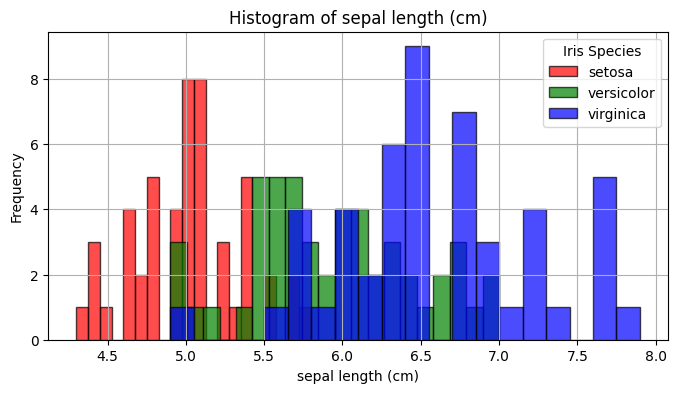

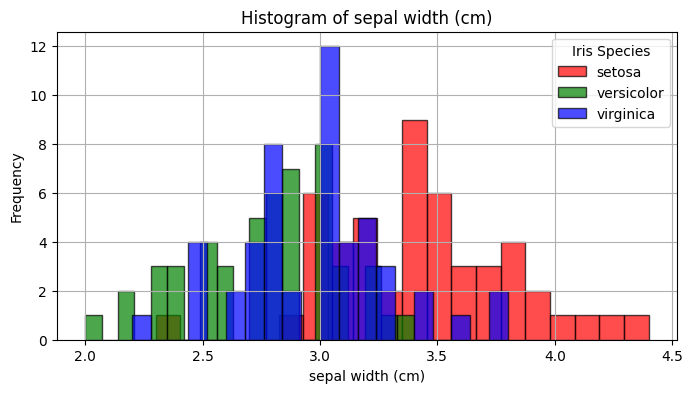

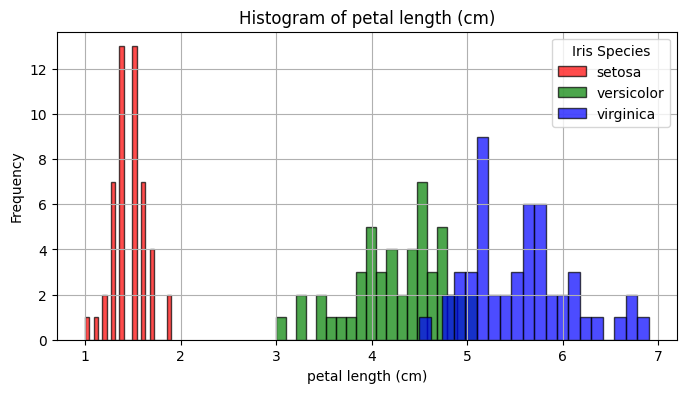

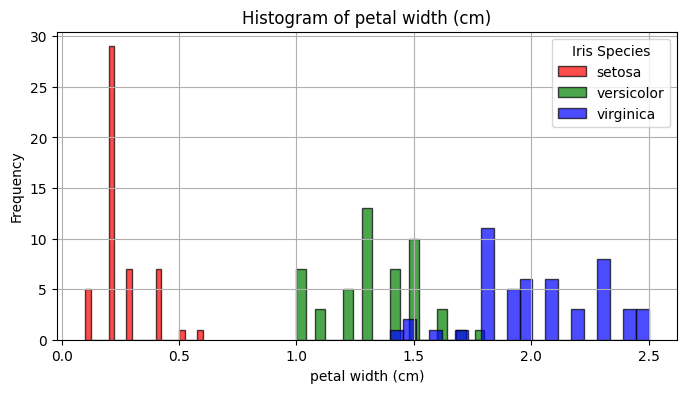

In [40]:
# Plot histograms for each feature
features = iris_dataframe.columns[:-2]  # Exclude 'target' and 'species' columns
species = iris_dataframe['species'].unique() # getting the unique species

# defining the iris species colours
species_colours = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

# Loop though the features and plot the histogram
for feature in features: 
    plt.figure(figsize=(8, 4)) # sets the size of the graph
    for specie in species: # loop through the species
        iris_subset = iris_dataframe[iris_dataframe['species'] == specie] # subset the data by species
        plt.hist(iris_subset[feature], 
                 bins=20, edgecolor='k', alpha=0.7, label=specie, 
                 color=species_colours[specie]) # plot the histogram
    plt.title(f'Histogram of {feature}') # title of the graph
    plt.xlabel(feature) # x-axis label
    plt.ylabel('Frequency') # y-axis label
    plt.legend(title='Iris Species') # add the legend
    plt.grid(True)
    plt.show()

## Task 5: Investigate Relationships

### ***Task 5 Description:*** 

Choose any two features from the data set and create a scatter plot of them.  
Color-code the three different classes of the scatter plot points.

### ***Task 5 Submission:***

<Figure size 800x400 with 0 Axes>

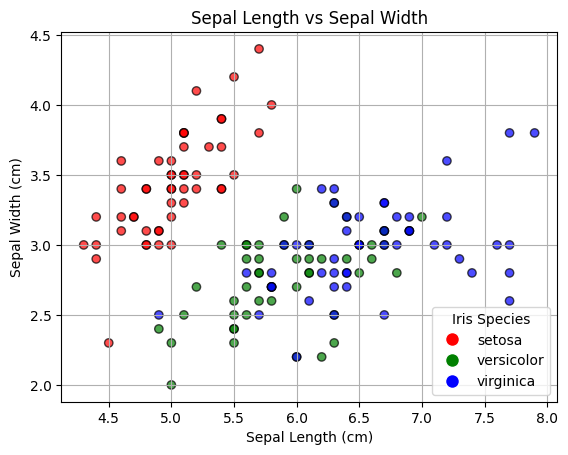

In [41]:
# Reference: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html

# Define the size of the plot
plt.figure(figsize=(8, 4))  # Set the size of the figure

# Scatter plot of sepal length vs sepal width
fig, ax = plt.subplots()



# Create the scatter plot
scatter = ax.scatter(iris_dataframe['sepal length (cm)'], # x-axis
           iris_dataframe['sepal width (cm)'],  # y-axis 
            c=iris_dataframe['species'].map(species_colours),  # Map species to colours
            edgecolor='k',  # Add edge color to points
            alpha=0.7,)  # Set transparency


# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# create the legend labels and handles
legend_labels = species_colours.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species)
                  for species, color in species_colours.items()]

# create the legend labels and handles
ax.legend(legend_handles, legend_labels, title='Iris Species', loc='lower right')

# Show the plot
plt.grid(True)
plt.show()

# Note had trouble with the legend not shwoing so added in a custom l;egend - Reference: https://how2matplotlib.com/custom-legends-with-matplotlib.html

## Task 6: Analyze  Relationships

### ***Task 6 Description:*** 

Use numpy.polyfit to add a regression line to the scatter plot from Task 5.

### ***Task 6 Submission:*** 

$ y = mx + c$

As can be seen below there is not a strong relationship between the sepal lenght and sepal width across the whole data set. See the black line on the graph.

Note add in lines for each species of iris

<Figure size 800x400 with 0 Axes>

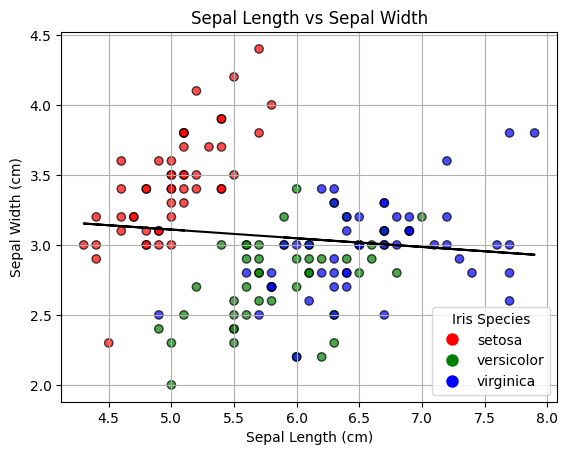

In [51]:
# Reference: https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# Reference: https://www.geeksforgeeks.org/numpys-polyfit-function-a-comprehensive-guide/


# Redefined the scatter plot from Task 5 with a line of best fit added in
plt.figure(figsize=(8, 4))  # Set the size of the figure

# Scatter plot of sepal length vs sepal width
fig, ax = plt.subplots()

# Create the scatter plot
scatter = ax.scatter(iris_dataframe['sepal length (cm)'], # x-axis
           iris_dataframe['sepal width (cm)'],  # y-axis 
            c=iris_dataframe['species'].map(species_colours),  # Map species to colours
            edgecolor='k',  # Add edge color to points
            alpha=0.7,)  # Set transparency

# Add labels and title
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')

# create the legend labels and handles
legend_labels = species_colours.keys()
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10, label=species)
                  for species, color in species_colours.items()]

# create the legend labels and handles
ax.legend(legend_handles, legend_labels, title='Iris Species', loc='lower right')

# Add a line of best fit  
m, c = np.polyfit(iris_dataframe['sepal length (cm)'], iris_dataframe['sepal width (cm)'], 1) # straight line

# Plot the line of best fit
ax.plot(iris_dataframe['sepal length (cm)'], m*iris_dataframe['sepal length (cm)'] + c, color='black') # plot the line

# Show the plot
plt.grid(True)
plt.show()


## Task 7: Analyze  Class Distributions

### Task Description: 

XYZ

In [43]:
iris_dataframe['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

## Task 8: Compute Correlations

### Task Description: 

XYZ

## Task 9: Fit a Simple Linear Regression

### Task Description: 

XYZ

## Task 10: Too Many Features 

### Task Description: 

XYZ

# End